In [1]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

### 1) $J_2 = 0$

In [2]:
J1,J3,D,h = 1.0,0.1,0.1,1.0
num_n::Int64 = 4
N_max::Int64,N_step::Int64 = 18,2
boundary = "OBC"
use_sparse = false

N_list_n::Vector{Vector{Int64}} = Vector{Vector{Int64}}(undef,num_n)
odlro_list_n::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,num_n)
n_list::Vector{Int64} = Vector{Int64}(undef,num_n)

top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\ODLRO\\$(boundary)")
for n in 1:num_n
    file = joinpath(top_folder,"Sn=$(n)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step).jld2")
    odlro_file = JLD2.load(file)
    N_list = odlro_file["N_list"]
    odlro_list = odlro_file["odlro_list"]
    N_list_n[n] = N_list
    odlro_list_n[n] = odlro_list
    n_list[n] = n
end;

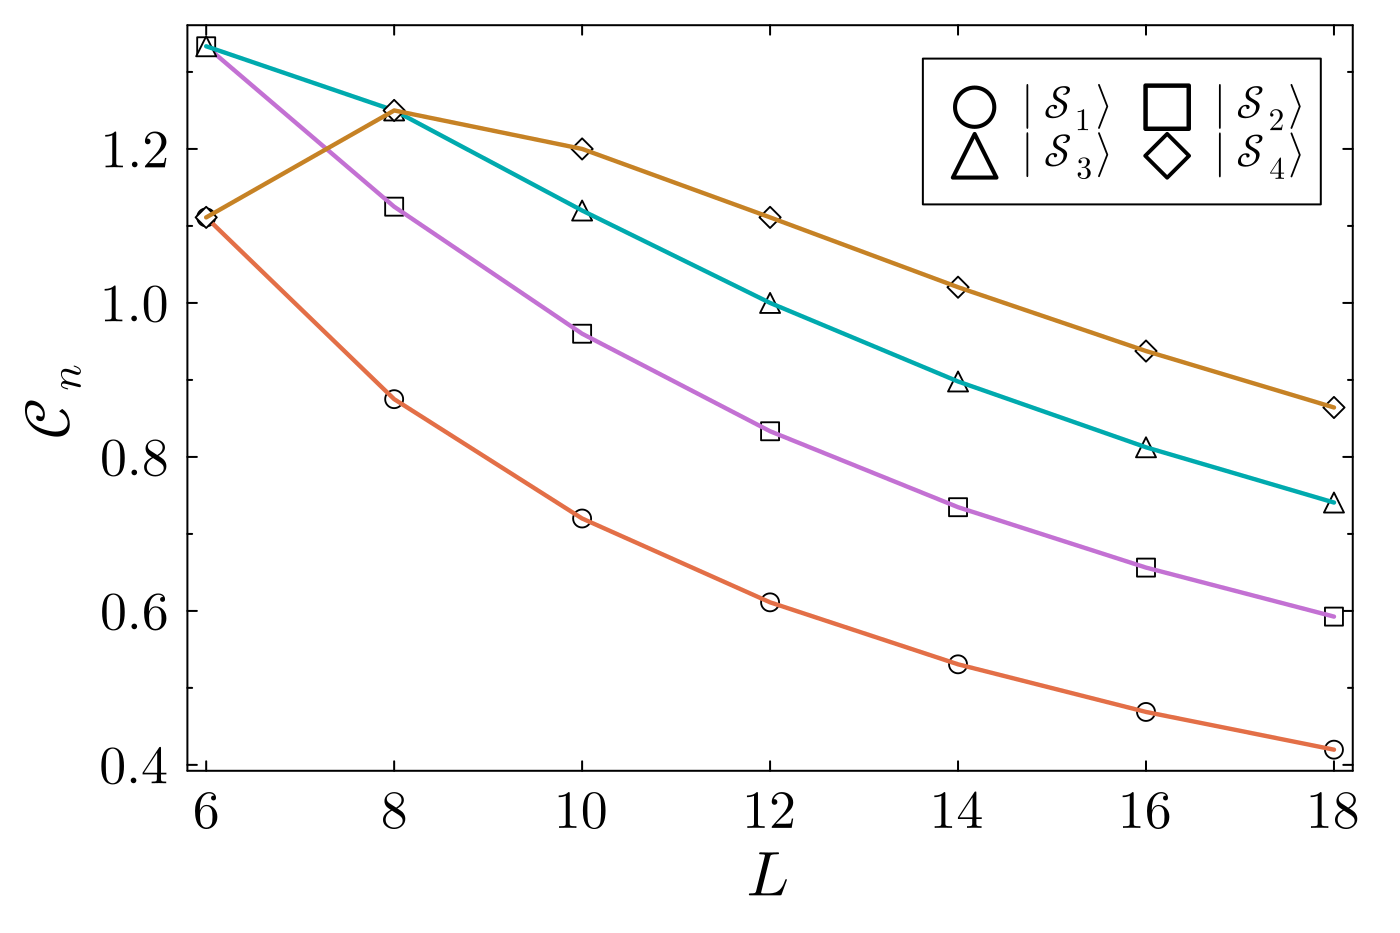

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\ODLRO\\OBC\\ODLRO_J1=1.0_J3=0.1_D=0.1_h=1.0_Nmax=18_Nstep=2.png"

In [6]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

p = scatter(N_list_n[1],odlro_list_n[1],marker=:circle,markercolor=:white,ms=5,markerstrokewidth=1,
             msc=:black,label="\$|\\mathcal{S}{}_{$(n_list[1])}\\rangle\$",size=plot_size,dpi=200)
plot!(N_list_n[1],odlro_list_n[1],lw=2.2,label=false,ls=:solid)

scatter!(N_list_n[2],odlro_list_n[2],marker=:rect,markercolor=:white,ms=4.5,markerstrokewidth=1,
          msc=:black,label="\$|\\mathcal{S}{}_{$(n_list[2])}\\rangle\$")
plot!(N_list_n[2],odlro_list_n[2],lw=2.2,label=false,ls=:solid)

scatter!(N_list_n[3],odlro_list_n[3],marker=:utriangle,markercolor=:white,ms=5,markerstrokewidth=1,
          msc=:black,label="\$|\\mathcal{S}{}_{$(n_list[3])}\\rangle\$")
plot!(N_list_n[3],odlro_list_n[3],lw=2.2,label=false,ls=:solid)
    
scatter!(N_list_n[4],odlro_list_n[4],marker=:diamond,markercolor=:white,ms=5.3,markerstrokewidth=1,
          msc=:black,label="\$|\\mathcal{S}{}_{$(n_list[4])}\\rangle\$")
plot!(N_list_n[4],odlro_list_n[4],lw=2.2,label=false,ls=:solid)

plot!(left_margin=4mm,right_margin=4mm,top_margin=1.2mm,bottom_margin=5mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.72,0.89),legendfontsize=15,legend_background_color=:white,
    legend_foreground_color=:black,legend_columns=2)
# plot!(ylims=(-3.45,-3.35))

xlabel!("\$L\$",guidefontsize=21)
ylabel!("\$\\mathcal{C{}_n}\$",guidefontsize=21)
# title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 6,2,18
y1,y_step,y2 = 0.4,0.2,1.2
# y1,y_step,y2 = -1.4,0.005,-1.380
xticks = (x1:x_step:x2,[@sprintf("%.0f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.1f",y) for y in y1:y_step:y2])
xminor_ticks = 0
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=17,tick_direction=:in)
plot!(xlims=(x1-0.2,x2+0.2))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\ODLRO\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"ODLRO_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_Nmax=$(N_max)_Nstep=$(N_step).png")

display(p)
# savefig(p,file_path)

### 2) $J_2 \neq 0$

In [22]:
N = 8
J1,J3,D,h = 1.0,0.1,0.1,1.0
num_n::Int64 = 4
boundary = "OBC"
use_sparse = false
J2_max::Float64 = 0.2

J2_list_n::Vector{Vector{Float64}} = Vector{Vector{Int64}}(undef,num_n)
odlro_list_n::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,num_n)
n_list::Vector{Int64} = Vector{Int64}(undef,num_n)

top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\ODLRO")
for n in 1:num_n
    file = joinpath(top_folder,"Sn=$(n)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2max=$(J2_max).jld2")
    odlro_file = JLD2.load(file)
    J2_list = odlro_file["J2_vals"]
    odlro_list = odlro_file["odlro_vals"]
    J2_list_n[n] = J2_list
    odlro_list_n[n] = odlro_list
    n_list[n] = n
end;

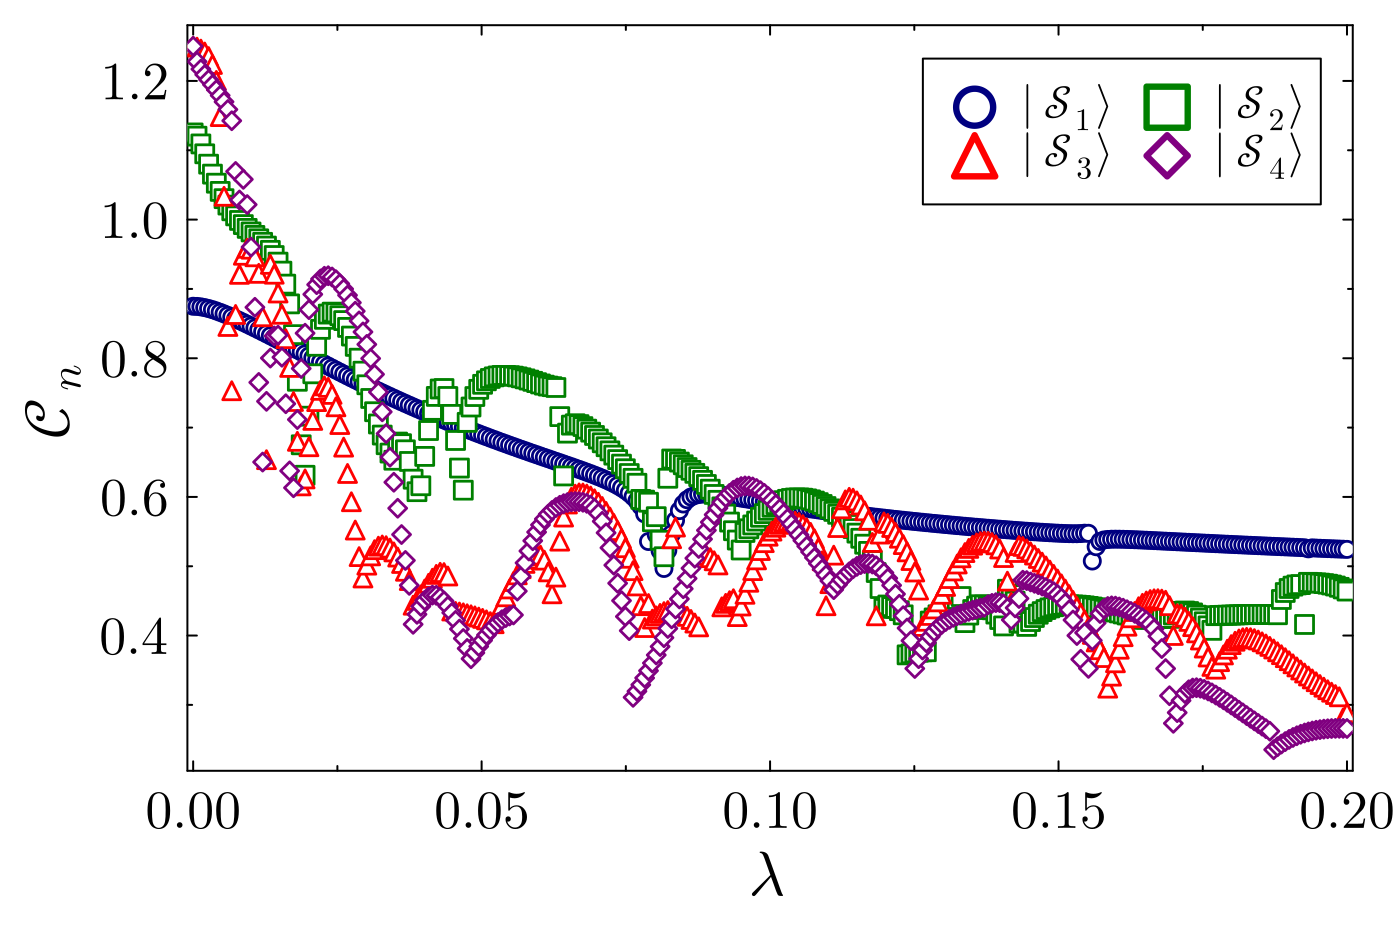

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=8\\sec_nbr_perturbed\\OBC\\ODLRO\\ODLRO_J1=1.0_J3=0.1_J2_D=0.1_h=1.0_J2max=0.2.png"

In [28]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

p = scatter(J2_list_n[1],odlro_list_n[1],marker=:circle,markercolor=:white,markerstrokecolor=:navy,markerstrokewidth=1.5,
             ms=4.5,label="\$|\\mathcal{S}{}_{$(n_list[1])}\\rangle\$",size=plot_size,dpi=200)

scatter!(J2_list_n[2],odlro_list_n[2],marker=:rect,markercolor=:white,markerstrokecolor=:green,markerstrokewidth=1.5,
          ms=4.5,label="\$|\\mathcal{S}{}_{$(n_list[2])}\\rangle\$")

scatter!(J2_list_n[3],odlro_list_n[3],marker=:utriangle,markercolor=:white,markerstrokecolor=:red,markerstrokewidth=1.5,
          ms=4.5,label="\$|\\mathcal{S}{}_{$(n_list[3])}\\rangle\$")
    
scatter!(J2_list_n[4],odlro_list_n[4],marker=:diamond,markercolor=:white,markerstrokecolor=:purple,markerstrokewidth=1.5,
          ms=4.5,label="\$|\\mathcal{S}{}_{$(n_list[4])}\\rangle\$")

plot!(left_margin=4mm,right_margin=4mm,top_margin=1.2mm,bottom_margin=5mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
# plot!(legend_position=(0.13,0.17),legendfontsize=14,legend_background_color=:white,
#     legend_foreground_color=:black,legend_columns=2)
plot!(legend_position=(0.72,0.89),legendfontsize=15,legend_background_color=:white,
    legend_foreground_color=:black,legend_columns=2)
# plot!(ylims=(-3.45,-3.35))

xlabel!("\$\\lambda\$",guidefontsize=21)
ylabel!("\$\\mathcal{C{}_n}\$",guidefontsize=21)
# title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0.00,0.05,0.20
# y1,y_step,y2 = 0.9,0.1,1.3
y1,y_step,y2 = 0.4,0.2,1.2
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.1f",y) for y in y1:y_step:y2])
xminor_ticks = 2
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=17,tick_direction=:in)
plot!(xlims=(x1-0.001,x2+0.001))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\ODLRO"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"ODLRO_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_J2_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2max=$(J2_max).png")

display(p)
# savefig(p,file_path)